# SLEAP Distance Calculation

Brief 1-2 sentence description of notebook.

In [1]:
#calling it a second time may prevent some graphics errors
import matplotlib.pyplot as plt

In [2]:
import os
import glob
import sys


In [3]:
# Imports of all used packages and libraries
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib as mpl
# import matplotlib.pyplot as plt

from collections import defaultdict



In [4]:
import os 

## Inputs & Data

Explanation of each input and where it comes from.

## Outputs

Describe each output that the notebook creates. 

- Is it a plot or is it data?

- How valuable is the output and why is it valuable or useful?

In [5]:
# Inputs and Required data loading
# input varaible names are in all caps snake case
# Whenever an input changes or is used for processing 
# the vairables are all lower in snake case
OUTPUT_DIR = r"./proc/" # where data is saved should always be shown in the inputs
os.makedirs(OUTPUT_DIR, exist_ok=True)
OUTPUT_PREFIX = "rce_pilot_3"

In [6]:
FULL_LFP_TRACES_PKL = "{}_04_spectral_and_sleap.pkl".format(OUTPUT_PREFIX)

## Processing

Describe what is done to the data here and how inputs are manipulated to generate outputs. 

In [7]:
exploded_columns = pd.read_pickle("./proc/exploded_columns.pkl")


In [8]:
exploded_columns.columns

Index(['thorax_velocity_sum', 'thorax_velocity_diff', 'subject_tail_base',
       'frame_index', 'nose_to_reward_port_diff', 'video_name',
       'tone_start_to_stop_frame', 'reward_port', '10s_before_tone_frame',
       'nose_to_reward_port_sum', 'to_reward_port_angle_diff',
       'nose_to_tail_sum', 'get_reward_frame', 'agent_nose', 'agent_thorax',
       'tone_stop_frame', 'competition_closeness', 'session_dir',
       'tone_start_frame', 'box_bottom_left', 'agent_tail_base',
       'box_bottom_right', 'subject_to_reward_port_angle', 'notes',
       'box_top_left', 'box_number', 'experiment',
       'subject_nose_to_reward_port', 'first_timestamp', 'start_frame',
       'tone_stop_timestamp', 'sleap_name', 'subject_thorax_to_agent_thorax',
       '10s_after_tone_frame', 'subject_thorax', 'within_trial_frame_index',
       'tone_start_timestamp', 'all_subjects', 'agent', 'stop_frame',
       'nose_to_tail_diff', 'agent_nose_to_reward_port',
       'agent_to_reward_port_angle', 'curr

In [9]:
exploded_columns.head()

,thorax_velocity_sum,thorax_velocity_diff,subject_tail_base,frame_index,nose_to_reward_port_diff,video_name,tone_start_to_stop_frame,reward_port,10s_before_tone_frame,nose_to_reward_port_sum,...,closebool_agent_nose_to_reward_port,movingbool_subject_thorax_velocity,movingbool_agent_thorax_velocity,manual_cluster_id,standard_embedding_x,standard_embedding_y,clusterable_embedding_x,clusterable_embedding_y,kmeans_cluster,video_id
0,1.864783,1.641202,"[65.86894804065032, 31.8436244490543]",1086,29.128517,20240317_151922_long_comp_subj_3-1_and_3-3.1,"(1286, 1486)","[60.41313477701829, 37.56463736381247]",1086,30.571493,...,False,False,True,2,-2.570171,-0.481869,-2.189707,1.966187,4,0
1,0.938264,0.78134,"[65.86498651970352, 31.842588737266972]",1087,29.239168,20240317_151922_long_comp_subj_3-1_and_3-3.1,"(1286, 1486)","[60.41313477701829, 37.56463736381247]",1086,30.657799,...,False,False,True,2,-3.663163,-0.950025,-2.932820,1.766647,4,0
2,0.300687,0.158209,"[65.87072564620338, 31.843130896866835]",1088,29.328625,20240317_151922_long_comp_subj_3-1_and_3-3.1,"(1286, 1486)","[60.41313477701829, 37.56463736381247]",1086,30.738615,...,False,False,False,2,-4.050153,-0.833175,-3.094593,1.802257,4,0
3,-0.062844,-0.229304,"[66.05605372229157, 31.84940499209838]",1089,29.413448,20240317_151922_long_comp_subj_3-1_and_3-3.1,"(1286, 1486)","[60.41313477701829, 37.56463736381247]",1086,30.82523,...,False,False,False,2,-4.048223,-0.882780,-3.120238,1.702991,4,0
4,-0.214782,-0.405428,"[65.86966472606377, 31.847913118440818]",1090,29.512577,20240317_151922_long_comp_subj_3-1_and_3-3.1,"(1286, 1486)","[60.41313477701829, 37.56463736381247]",1086,30.916037,...,False,False,False,2,-4.029259,-0.994211,-3.105247,1.635060,4,0


In [10]:
grouped_exploded_columns = pd.read_pickle("./proc/grouped_exploded_columns.pkl")


In [11]:
grouped_exploded_columns.head()

,video_name,current_subject,10s_after_tone_frame,10s_before_tone_frame,agent_locations,agent_nose,agent_nose_to_reward_port,agent_tail_base,agent_thorax,agent_thorax_velocity,...,experiment,first_timestamp,last_timestamp,reward_port,session_dir,sleap_name,start_frame,stop_frame,tracked_subject,video_id
0,20240317_151922_long_comp_subj_3-1_and_3-3.1,3.1,"[1686, 1686, 1686, 1686, 1686, 1686, 1686, 168...","[1086, 1086, 1086, 1086, 1086, 1086, 1086, 108...","[[[47.329585864054316, 13.395104517336417], [4...","[[43.139588993359475, 13.385259646809214], [43...","[29.850004, 29.948483, 30.033619, 30.119339, 3...","[[54.49241922411595, 12.722769593270066], [54....","[[51.04336785027878, 11.609328010205985], [51....","[1.75459, 0.8485628, 0.20676309, -0.17881195, ...",...,long_comp,2415571.0,48236575.0,"[60.41313477701829, 37.56463736381247]",20240317_151922_long_comp_subj_3-1_and_3-3,20240317_151922_long_comp_subj_3-1_and_3-3.1.f...,1,45736,"[3.1, 3.3]",0
1,20240317_151922_long_comp_subj_3-1_and_3-3.1,3.3,"[1686, 1686, 1686, 1686, 1686, 1686, 1686, 168...","[1086, 1086, 1086, 1086, 1086, 1086, 1086, 108...","[[[61.390550187751444, 36.122362967315595], [5...","[[60.14673983110819, 38.0809500426292], [60.14...","[0.7214881, 0.70931464, 0.7049949, 0.705891, 0...","[[65.86894804065032, 31.8436244490543], [65.86...","[[64.11036004541992, 34.137273635147906], [64....","[0.11019329, 0.08970148, 0.09392373, 0.1159680...",...,long_comp,2415571.0,48236575.0,"[60.41313477701829, 37.56463736381247]",20240317_151922_long_comp_subj_3-1_and_3-3,20240317_151922_long_comp_subj_3-1_and_3-3.1.f...,1,45736,"[3.1, 3.3]",0
2,20240317_172017_long_comp_subj_4-2_and_4-3.1,4.2,"[1701, 1701, 1701, 1701, 1701, 1701, 1701, 170...","[1100, 1100, 1100, 1100, 1100, 1100, 1100, 110...","[[[61.75545079959451, 33.21821636449367], [59....","[[60.79884848875681, 35.963595797483414], [60....","[1.2679133, 1.1848546, 1.0835545, 1.0503241, 1...","[[56.32709801682682, 29.966639024342353], [56....","[[57.3449526902064, 32.078917344899914], [57.5...","[0.28695866, 0.29812592, 0.3080636, 0.34382957...",...,long_comp,2020598.0,61007363.0,"[60.1935112853622, 35.25163617313764]",20240317_172017_long_comp_subj_4-2_and_4-3,20240317_172017_long_comp_subj_4-2_and_4-3.1.f...,1,58878,"[4.2, 4.3]",1
3,20240317_172017_long_comp_subj_4-2_and_4-3.1,4.3,"[1701, 1701, 1701, 1701, 1701, 1701, 1701, 170...","[1100, 1100, 1100, 1100, 1100, 1100, 1100, 110...","[[[67.1750209289574, 9.986812953490931], [69.1...","[[65.23110812441777, 8.220414676017084], [62.5...","[28.389486, 28.209822, 28.007545, 27.813864, 2...","[[72.8621368084351, 13.53665765315761], [72.41...","[[72.18478668206376, 10.328978616940205], [71....","[21.16527, 21.272135, 21.302916, 21.162853, 20...",...,long_comp,2020598.0,61007363.0,"[60.1935112853622, 35.25163617313764]",20240317_172017_long_comp_subj_4-2_and_4-3,20240317_172017_long_comp_subj_4-2_and_4-3.1.f...,1,58878,"[4.2, 4.3]",1
4,20240318_143819_long_comp_subj_3-3_and_3-4.1,3.3,"[1733, 1733, 1733, 1733, 1733, 1733, 1733, 173...","[1134, 1134, 1134, 1134, 1134, 1134, 1134, 113...","[[[61.29948457574409, 34.98487547102027], [61....","[[58.01061366578415, 33.98924535992776], [58.0...","[3.077167, 3.613538, 4.1945314, 4.827455, 5.53...","[[68.06216599593583, 32.37245454635553], [67.8...","[[65.57930503887175, 33.84569047638807], [65.3...","[8.288751, 9.374064, 10.581271, 11.979093, 13....",...,long_comp,1938832.0,60762064.0,"[60.56358180384908, 36.19153363328459]",20240318_143819_long_comp_subj_3-3_and_3-4,20240318_143819_long_comp_subj_3-3_and_3-4.1.f...,1,58752,"[3.3, 3.4]",2


In [12]:
grouped_exploded_columns["10s_after_tone_frame"].iloc[0].shape

(17987,)

In [13]:
grouped_exploded_columns.columns

Index(['video_name', 'current_subject', '10s_after_tone_frame',
       '10s_before_tone_frame', 'agent_locations', 'agent_nose',
       'agent_nose_to_reward_port', 'agent_tail_base', 'agent_thorax',
       'agent_thorax_velocity', 'agent_to_reward_port_angle',
       'closebool_agent_nose_to_reward_port',
       'closebool_subject_nose_to_reward_port', 'clusterable_embedding_x',
       'clusterable_embedding_y', 'color', 'comp_id', 'competition_closeness',
       'competitiveness', 'condition ', 'frame_index', 'get_reward_frame',
       'kmeans_cluster', 'manual_cluster_id',
       'movingbool_agent_thorax_velocity',
       'movingbool_subject_thorax_velocity', 'nose_to_reward_port_diff',
       'nose_to_reward_port_sum', 'nose_to_tail_diff', 'nose_to_tail_sum',
       'notes', 'out_reward_frame', 'standard_embedding_x',
       'standard_embedding_y', 'subject_locations', 'subject_nose',
       'subject_nose_to_reward_port', 'subject_tail_base', 'subject_thorax',
       'subject_thora

In [14]:
import numpy as np
from collections import defaultdict

def get_repeating_ranges(arr):
    repeating_ranges = defaultdict(list)
    n = len(arr)

    i = 0
    while i < n:
        value = arr[i]
        start = i
        
        # Move to the end of the current block of repeating values
        while i < n and arr[i] == value:
            i += 1
        
        end = i - 1
        
        # If the value repeats, store the range in the dictionary
        if end > start:
            repeating_ranges[value].append((start, end))
        else:
            # Move to the next element
            i += 1
            
    return dict(repeating_ranges)

# Example usage
arr = np.array([1, 2, 2, 3, 3, 3, 4, 2, 2, 5])
repeating_ranges = get_repeating_ranges(arr)
print(repeating_ranges)

{np.int64(3): [(4, 5)]}


In [15]:
grouped_exploded_columns["tone_start_timestamp"] = grouped_exploded_columns["tone_start_timestamp"].apply(lambda x: x.astype(int))

In [16]:
grouped_exploded_columns["tone_start_ranges"] = grouped_exploded_columns["tone_start_timestamp"].apply(lambda x: get_repeating_ranges(x))

# Calculating relationship between win/lose ratio and competitiveness

In [17]:
grouped_exploded_columns.columns

Index(['video_name', 'current_subject', '10s_after_tone_frame',
       '10s_before_tone_frame', 'agent_locations', 'agent_nose',
       'agent_nose_to_reward_port', 'agent_tail_base', 'agent_thorax',
       'agent_thorax_velocity', 'agent_to_reward_port_angle',
       'closebool_agent_nose_to_reward_port',
       'closebool_subject_nose_to_reward_port', 'clusterable_embedding_x',
       'clusterable_embedding_y', 'color', 'comp_id', 'competition_closeness',
       'competitiveness', 'condition ', 'frame_index', 'get_reward_frame',
       'kmeans_cluster', 'manual_cluster_id',
       'movingbool_agent_thorax_velocity',
       'movingbool_subject_thorax_velocity', 'nose_to_reward_port_diff',
       'nose_to_reward_port_sum', 'nose_to_tail_diff', 'nose_to_tail_sum',
       'notes', 'out_reward_frame', 'standard_embedding_x',
       'standard_embedding_y', 'subject_locations', 'subject_nose',
       'subject_nose_to_reward_port', 'subject_tail_base', 'subject_thorax',
       'subject_thora

In [18]:
grouped_exploded_columns["condition "] = grouped_exploded_columns["condition "].apply(lambda x: x.astype(str))

In [19]:
grouped_exploded_columns["current_subject"] = grouped_exploded_columns["current_subject"].astype(str)

In [20]:
grouped_exploded_columns["trial_label"] = grouped_exploded_columns.apply(lambda x: np.array(["win" if cond == x["current_subject"] else ("lose" if cond == x["agent"] else cond) for cond in x["condition "]]), axis=1)
                                                                         

In [21]:
grouped_exploded_columns["condition "].head()

0    [3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, ...
1    [3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, ...
2    [4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, ...
3    [4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, ...
4    [3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, ...
Name: condition , dtype: object

In [22]:
grouped_exploded_columns["trial_label"].head()

0    [lose, lose, lose, lose, lose, lose, lose, los...
1    [win, win, win, win, win, win, win, win, win, ...
2    [win, win, win, win, win, win, win, win, win, ...
3    [lose, lose, lose, lose, lose, lose, lose, los...
4    [lose, lose, lose, lose, lose, lose, lose, los...
Name: trial_label, dtype: object

In [23]:
grouped_exploded_columns["competition_closeness"].head()

0    [Subj 2 then Subj 1, Subj 2 then Subj 1, Subj ...
1    [Subj 2 then Subj 1, Subj 2 then Subj 1, Subj ...
2    [Subj 1 then Subj 2, Subj 1 then Subj 2, Subj ...
3    [Subj 1 then Subj 2, Subj 1 then Subj 2, Subj ...
4    [Subj 2 Only, Subj 2 Only, Subj 2 Only, Subj 2...
Name: competition_closeness, dtype: object

In [24]:
np.unique(grouped_exploded_columns["competition_closeness"].iloc[0])

array(['Subj 1 Only', 'Subj 1 blocking Subj 2', 'Subj 1 then Subj 2',
       'Subj 2 blocking Subj 1', 'Subj 2 then Subj 1'], dtype='<U22')

In [25]:
competitiveness_dictionary = {"Subj 1 Only": "non_comp",
"Subj 2 Only": "non_comp",
"Close Call": "competitive",
"Subj 1 then Subj 2": "competitive",
"Subj 2 then Subj 1": "competitive",
"Subj 1 blocking Subj 2": "competitive",
"Subj 2 blocking Subj 1": "competitive",
"After trial": "After trial"}

In [26]:

grouped_exploded_columns["competition_label"] = grouped_exploded_columns["competition_closeness"].apply(lambda x: np.vectorize(competitiveness_dictionary.get)(x))

In [27]:
grouped_exploded_columns["per_trial_competition_label"] = grouped_exploded_columns.apply(lambda x: [str(x["competition_label"][value[0][0]]) for key, value in x["tone_start_ranges"].items()], axis=1)

In [28]:
grouped_exploded_columns["per_trial_trial_label"] = grouped_exploded_columns.apply(lambda x: [str(x["trial_label"][value[0][0]]) for key, value in x["tone_start_ranges"].items()], axis=1)

In [29]:
grouped_exploded_columns["per_trial_competition_label"].iloc[0]

['competitive',
 'non_comp',
 'non_comp',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive',
 'competitive']

In [30]:
grouped_exploded_columns["per_trial_trial_label"].iloc[0]

['lose',
 'win',
 'win',
 'win',
 'win',
 'lose',
 'win',
 'lose',
 'win',
 'win',
 'win',
 'win',
 'lose',
 'lose',
 'lose',
 'lose',
 'win',
 'lose',
 'win',
 'win',
 'lose',
 'win',
 'lose',
 'lose',
 'win',
 'lose',
 'win',
 'win',
 'win',
 'win']

In [31]:
grouped_exploded_columns["per_trial_competition_label"].apply(lambda x: np.unique(x))

0                  [competitive, non_comp]
1                  [competitive, non_comp]
2                  [competitive, non_comp]
3                  [competitive, non_comp]
4                  [competitive, non_comp]
5                  [competitive, non_comp]
6                  [competitive, non_comp]
7                  [competitive, non_comp]
8            [None, competitive, non_comp]
9            [None, competitive, non_comp]
10                 [competitive, non_comp]
11                 [competitive, non_comp]
12                 [competitive, non_comp]
13                 [competitive, non_comp]
14    [After trial, competitive, non_comp]
15    [After trial, competitive, non_comp]
16                 [competitive, non_comp]
17                 [competitive, non_comp]
18                 [competitive, non_comp]
19                 [competitive, non_comp]
20    [After trial, competitive, non_comp]
21    [After trial, competitive, non_comp]
22                 [competitive, non_comp]
23         

In [32]:
grouped_exploded_columns["per_trial_trial_label"].apply(lambda x: np.unique(x))

0          [lose, win]
1          [lose, win]
2     [lose, tie, win]
3     [lose, tie, win]
4               [lose]
5                [win]
6     [lose, tie, win]
7     [lose, tie, win]
8     [lose, tie, win]
9     [lose, tie, win]
10    [lose, tie, win]
11    [lose, tie, win]
12    [lose, tie, win]
13    [lose, tie, win]
14         [lose, tie]
15          [tie, win]
16    [lose, tie, win]
17    [lose, tie, win]
18         [lose, win]
19         [lose, win]
20         [lose, win]
21         [lose, win]
22         [lose, tie]
23          [tie, win]
24    [lose, tie, win]
25    [lose, tie, win]
26    [lose, tie, win]
27    [lose, tie, win]
Name: per_trial_trial_label, dtype: object

In [33]:
grouped_exploded_columns["per_trial_trial_label"].apply(lambda x: len(x))

0     30
1     30
2     41
3     41
4     41
5     41
6     41
7     41
8     41
9     41
10    41
11    41
12    21
13    21
14    21
15    21
16    41
17    41
18    21
19    21
20    21
21    21
22    21
23    21
24    21
25    21
26    18
27    18
Name: per_trial_trial_label, dtype: int64

In [34]:
grouped_exploded_columns["per_trial_competition_label"].apply(lambda x: len(x))

0     30
1     30
2     41
3     41
4     41
5     41
6     41
7     41
8     41
9     41
10    41
11    41
12    21
13    21
14    21
15    21
16    41
17    41
18    21
19    21
20    21
21    21
22    21
23    21
24    21
25    21
26    18
27    18
Name: per_trial_competition_label, dtype: int64

In [35]:
grouped_exploded_columns["trial_comp_tuple"] = grouped_exploded_columns.apply(lambda x: list(zip(x["per_trial_trial_label"], x["per_trial_competition_label"])), axis=1)

In [38]:
# Saving a copy to look at all trial types
copy_of_grouped_exploded_columns = grouped_exploded_columns.copy()

In [39]:
grouped_exploded_columns["trial_comp_tuple"] = grouped_exploded_columns["trial_comp_tuple"].apply(lambda x: [tup for tup in x if all("After" not in item for item in tup)])

In [40]:
grouped_exploded_columns["trial_comp_tuple"] = grouped_exploded_columns["trial_comp_tuple"].apply(lambda x: [tup for tup in x if all("tie" not in item for item in tup)])

In [41]:
grouped_exploded_columns["trial_comp_tuple"]

0     [(lose, competitive), (win, non_comp), (win, n...
1     [(win, competitive), (lose, non_comp), (lose, ...
2     [(win, competitive), (lose, competitive), (los...
3     [(lose, competitive), (win, competitive), (win...
4     [(lose, non_comp), (lose, non_comp), (lose, no...
5     [(win, non_comp), (win, non_comp), (win, non_c...
6     [(win, competitive), (lose, competitive), (los...
7     [(lose, competitive), (win, competitive), (win...
8     [(win, non_comp), (win, competitive), (win, co...
9     [(lose, non_comp), (lose, competitive), (lose,...
10    [(win, competitive), (lose, competitive), (win...
11    [(lose, competitive), (win, competitive), (los...
12    [(win, non_comp), (win, competitive), (lose, n...
13    [(lose, non_comp), (lose, competitive), (win, ...
14    [(lose, non_comp), (lose, competitive), (lose,...
15    [(win, non_comp), (win, competitive), (win, co...
16    [(lose, non_comp), (win, competitive), (lose, ...
17    [(win, non_comp), (lose, competitive), (wi

In [42]:
from collections import Counter

In [43]:
grouped_exploded_columns["trial_counts"] = grouped_exploded_columns["trial_comp_tuple"].apply(lambda x: Counter([tup[0] for tup in x]))

In [44]:
grouped_exploded_columns["comp_counts"] = grouped_exploded_columns["trial_comp_tuple"].apply(lambda x: Counter([tup[1] for tup in x]))

In [45]:
grouped_exploded_columns.head()

,video_name,current_subject,10s_after_tone_frame,10s_before_tone_frame,agent_locations,agent_nose,agent_nose_to_reward_port,agent_tail_base,agent_thorax,agent_thorax_velocity,...,tracked_subject,video_id,tone_start_ranges,trial_label,competition_label,per_trial_competition_label,per_trial_trial_label,trial_comp_tuple,trial_counts,comp_counts
0,20240317_151922_long_comp_subj_3-1_and_3-3.1,3.1,"[1686, 1686, 1686, 1686, 1686, 1686, 1686, 168...","[1086, 1086, 1086, 1086, 1086, 1086, 1086, 108...","[[[47.329585864054316, 13.395104517336417], [4...","[[43.139588993359475, 13.385259646809214], [43...","[29.850004, 29.948483, 30.033619, 30.119339, 3...","[[54.49241922411595, 12.722769593270066], [54....","[[51.04336785027878, 11.609328010205985], [51....","[1.75459, 0.8485628, 0.20676309, -0.17881195, ...",...,"[3.1, 3.3]",0,"{1287955: [(0, 599)], 3287980: [(600, 1199)], ...","[lose, lose, lose, lose, lose, lose, lose, los...","[competitive, competitive, competitive, compet...","[competitive, non_comp, non_comp, competitive,...","[lose, win, win, win, win, lose, win, lose, wi...","[(lose, competitive), (win, non_comp), (win, n...","{'lose': 12, 'win': 18}","{'competitive': 28, 'non_comp': 2}"
1,20240317_151922_long_comp_subj_3-1_and_3-3.1,3.3,"[1686, 1686, 1686, 1686, 1686, 1686, 1686, 168...","[1086, 1086, 1086, 1086, 1086, 1086, 1086, 108...","[[[61.390550187751444, 36.122362967315595], [5...","[[60.14673983110819, 38.0809500426292], [60.14...","[0.7214881, 0.70931464, 0.7049949, 0.705891, 0...","[[65.86894804065032, 31.8436244490543], [65.86...","[[64.11036004541992, 34.137273635147906], [64....","[0.11019329, 0.08970148, 0.09392373, 0.1159680...",...,"[3.1, 3.3]",0,"{1287955: [(0, 599)], 3287980: [(600, 1199)], ...","[win, win, win, win, win, win, win, win, win, ...","[competitive, competitive, competitive, compet...","[competitive, non_comp, non_comp, competitive,...","[win, lose, lose, lose, lose, win, lose, win, ...","[(win, competitive), (lose, non_comp), (lose, ...","{'win': 12, 'lose': 18}","{'competitive': 28, 'non_comp': 2}"
2,20240317_172017_long_comp_subj_4-2_and_4-3.1,4.2,"[1701, 1701, 1701, 1701, 1701, 1701, 1701, 170...","[1100, 1100, 1100, 1100, 1100, 1100, 1100, 110...","[[[61.75545079959451, 33.21821636449367], [59....","[[60.79884848875681, 35.963595797483414], [60....","[1.2679133, 1.1848546, 1.0835545, 1.0503241, 1...","[[56.32709801682682, 29.966639024342353], [56....","[[57.3449526902064, 32.078917344899914], [57.5...","[0.28695866, 0.29812592, 0.3080636, 0.34382957...",...,"[4.2, 4.3]",1,"{1302635: [(0, 600)], 3302656: [(601, 1200)], ...","[win, win, win, win, win, win, win, win, win, ...","[competitive, competitive, competitive, compet...","[competitive, competitive, competitive, compet...","[win, lose, lose, lose, lose, lose, lose, lose...","[(win, competitive), (lose, competitive), (los...","{'win': 6, 'lose': 33}","{'competitive': 36, 'non_comp': 3}"
3,20240317_172017_long_comp_subj_4-2_and_4-3.1,4.3,"[1701, 1701, 1701, 1701, 1701, 1701, 1701, 170...","[1100, 1100, 1100, 1100, 1100, 1100, 1100, 110...","[[[67.1750209289574, 9.986812953490931], [69.1...","[[65.23110812441777, 8.220414676017084], [62.5...","[28.389486, 28.209822, 28.007545, 27.813864, 2...","[[72.8621368084351, 13.53665765315761], [72.41...","[[72.18478668206376, 10.328978616940205], [71....","[21.16527, 21.272135, 21.302916, 21.162853, 20...",...,"[4.2, 4.3]",1,"{1302635: [(0, 600)], 3302656: [(601, 1200)], ...","[lose, lose, lose, lose, lose, lose, lose, los...","[competitive, competitive, competitive, compet...","[competitive, competitive, competitive, compet...","[lose, win, win, win, win, win, win, win, win,...","[(lose, competitive), (win, competitive), (win...","{'lose': 6, 'win': 33}","{'competitive': 36, 'non_comp': 3}"
4,20240318_143819_long_comp_subj_3-3_and_3-4.1,3.3,"[1733, 1733, 1733, 1733, 1733, 1733, 1733, 173...","[1134, 1134, 1134, 1134, 1134, 1134, 1134, 113...","[[[61.29948457574409, 34.98487547102027], [61....","[[58.0

In [46]:
grouped_exploded_columns["trial_ratios"] = grouped_exploded_columns["trial_counts"].apply(lambda x: {key: value/sum(x.values()) for key, value in x.items()})

In [47]:
grouped_exploded_columns["comp_ratios"] = grouped_exploded_columns["comp_counts"].apply(lambda x: {key: value/sum(x.values()) for key, value in x.items()})

In [48]:
grouped_exploded_columns["dominance_ratios"] = grouped_exploded_columns["trial_counts"].apply(lambda x: np.abs((x.get("win", 0) - x.get("lose", 0))/sum(x.values())))

In [49]:
grouped_exploded_columns["dominance_ratios"].head()

0    0.200000
1    0.200000
2    0.692308
3    0.692308
4    1.000000
Name: dominance_ratios, dtype: float64

In [50]:
grouped_exploded_columns["trial_ratios"].head()

0                            {'lose': 0.4, 'win': 0.6}
1                            {'win': 0.4, 'lose': 0.6}
2    {'win': 0.15384615384615385, 'lose': 0.8461538...
3    {'lose': 0.15384615384615385, 'win': 0.8461538...
4                                        {'lose': 1.0}
Name: trial_ratios, dtype: object

In [51]:
grouped_exploded_columns["comp_ratios"].head()

0    {'competitive': 0.9333333333333333, 'non_comp'...
1    {'competitive': 0.9333333333333333, 'non_comp'...
2    {'competitive': 0.9230769230769231, 'non_comp'...
3    {'competitive': 0.9230769230769231, 'non_comp'...
4    {'non_comp': 0.6341463414634146, 'competitive'...
Name: comp_ratios, dtype: object

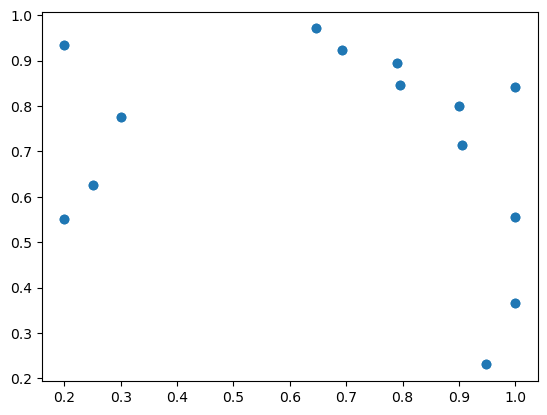

In [52]:
plt.plot(grouped_exploded_columns["dominance_ratios"], grouped_exploded_columns["comp_ratios"].apply(lambda x: x.get("competitive", 0)), 'o')

# Looking at distances through out the different trials

In [53]:
grouped_exploded_columns.head()

,video_name,current_subject,10s_after_tone_frame,10s_before_tone_frame,agent_locations,agent_nose,agent_nose_to_reward_port,agent_tail_base,agent_thorax,agent_thorax_velocity,...,trial_label,competition_label,per_trial_competition_label,per_trial_trial_label,trial_comp_tuple,trial_counts,comp_counts,trial_ratios,comp_ratios,dominance_ratios
0,20240317_151922_long_comp_subj_3-1_and_3-3.1,3.1,"[1686, 1686, 1686, 1686, 1686, 1686, 1686, 168...","[1086, 1086, 1086, 1086, 1086, 1086, 1086, 108...","[[[47.329585864054316, 13.395104517336417], [4...","[[43.139588993359475, 13.385259646809214], [43...","[29.850004, 29.948483, 30.033619, 30.119339, 3...","[[54.49241922411595, 12.722769593270066], [54....","[[51.04336785027878, 11.609328010205985], [51....","[1.75459, 0.8485628, 0.20676309, -0.17881195, ...",...,"[lose, lose, lose, lose, lose, lose, lose, los...","[competitive, competitive, competitive, compet...","[competitive, non_comp, non_comp, competitive,...","[lose, win, win, win, win, lose, win, lose, wi...","[(lose, competitive), (win, non_comp), (win, n...","{'lose': 12, 'win': 18}","{'competitive': 28, 'non_comp': 2}","{'lose': 0.4, 'win': 0.6}","{'competitive': 0.9333333333333333, 'non_comp'...",0.200000
1,20240317_151922_long_comp_subj_3-1_and_3-3.1,3.3,"[1686, 1686, 1686, 1686, 1686, 1686, 1686, 168...","[1086, 1086, 1086, 1086, 1086, 1086, 1086, 108...","[[[61.390550187751444, 36.122362967315595], [5...","[[60.14673983110819, 38.0809500426292], [60.14...","[0.7214881, 0.70931464, 0.7049949, 0.705891, 0...","[[65.86894804065032, 31.8436244490543], [65.86...","[[64.11036004541992, 34.137273635147906], [64....","[0.11019329, 0.08970148, 0.09392373, 0.1159680...",...,"[win, win, win, win, win, win, win, win, win, ...","[competitive, competitive, competitive, compet...","[competitive, non_comp, non_comp, competitive,...","[win, lose, lose, lose, lose, win, lose, win, ...","[(win, competitive), (lose, non_comp), (lose, ...","{'win': 12, 'lose': 18}","{'competitive': 28, 'non_comp': 2}","{'win': 0.4, 'lose': 0.6}","{'competitive': 0.9333333333333333, 'non_comp'...",0.200000
2,20240317_172017_long_comp_subj_4-2_and_4-3.1,4.2,"[1701, 1701, 1701, 1701, 1701, 1701, 1701, 170...","[1100, 1100, 1100, 1100, 1100, 1100, 1100, 110...","[[[61.75545079959451, 33.21821636449367], [59....","[[60.79884848875681, 35.963595797483414], [60....","[1.2679133, 1.1848546, 1.0835545, 1.0503241, 1...","[[56.32709801682682, 29.966639024342353], [56....","[[57.3449526902064, 32.078917344899914], [57.5...","[0.28695866, 0.29812592, 0.3080636, 0.34382957...",...,"[win, win, win, win, win, win, win, win, win, ...","[competitive, competitive, competitive, compet...","[competitive, competitive, competitive, compet...","[win, lose, lose, lose, lose, lose, lose, lose...","[(win, competitive), (lose, competitive), (los...","{'win': 6, 'lose': 33}","{'competitive': 36, 'non_comp': 3}","{'win': 0.15384615384615385, 'lose': 0.8461538...","{'competitive': 0.9230769230769231, 'non_comp'...",0.692308
3,20240317_172017_long_comp_subj_4-2_and_4-3.1,4.3,"[1701, 1701, 1701, 1701, 1701, 1701, 1701, 170...","[1100, 1100, 1100, 1100, 1100, 1100, 1100, 110...","[[[67.1750209289574, 9.986812953490931], [69.1...","[[65.23110812441777, 8.220414676017084], [62.5...","[28.389486, 28.209822, 28.007545, 27.813864, 2...","[[72.8621368084351, 13.53665765315761], [72.41...","[[72.18478668206376, 10.328978616940205], [71....","[21.16527, 21.272135, 21.302916, 21.162853, 20...",...,"[lose, lose, lose, lose, lose, lose, lose, los...","[competitive, competitive, competitive, compet...","[competitive, competitive, competitive, compet...","[lose, win, win, win, win, win, win, win, win,...","[(lose, competitive), (win, competitive), (win...","{'lose': 6, 'win': 33}","{'competitive': 36, 'non_comp': 3}","{'lose': 0.15384615384615385, 'win': 0.8461538...","{'competitive': 0.9230769230769231, 'non_comp'...",0.692308
4,20240318_143819_long_comp_subj_3-3_and_3-4.1,3.3,"[1733, 1733, 1733, 1733, 17

In [54]:
grouped_exploded_columns["tone_start_ranges"]

0     {1287955: [(0, 599)], 3287980: [(600, 1199)], ...
1     {1287955: [(0, 599)], 3287980: [(600, 1199)], ...
2     {1302635: [(0, 600)], 3302656: [(601, 1200)], ...
3     {1302635: [(0, 600)], 3302656: [(601, 1200)], ...
4     {1300498: [(0, 598)], 3300523: [(599, 1197)], ...
5     {1300498: [(0, 598)], 3300523: [(599, 1197)], ...
6     {1378134: [(0, 598)], 3378158: [(599, 1197)], ...
7     {1378134: [(0, 598)], 3378158: [(599, 1197)], ...
8     {1543730: [(0, 599)], 3543754: [(600, 1198)], ...
9     {1543730: [(0, 599)], 3543754: [(600, 1198)], ...
10    {1362950: [(0, 598)], 3362973: [(599, 1197)], ...
11    {1362950: [(0, 598)], 3362973: [(599, 1197)], ...
12    {34276299: [(0, 599)], 35276311: [(600, 1198)]...
13    {34276299: [(0, 599)], 35276311: [(600, 1198)]...
14    {34280576: [(0, 599)], 35280586: [(600, 1197)]...
15    {34280576: [(0, 599)], 35280586: [(600, 1197)]...
16    {1305657: [(0, 598)], 3305682: [(599, 1197)], ...
17    {1305657: [(0, 598)], 3305682: [(599, 1197

In [55]:
grouped_exploded_columns.columns

Index(['video_name', 'current_subject', '10s_after_tone_frame',
       '10s_before_tone_frame', 'agent_locations', 'agent_nose',
       'agent_nose_to_reward_port', 'agent_tail_base', 'agent_thorax',
       'agent_thorax_velocity', 'agent_to_reward_port_angle',
       'closebool_agent_nose_to_reward_port',
       'closebool_subject_nose_to_reward_port', 'clusterable_embedding_x',
       'clusterable_embedding_y', 'color', 'comp_id', 'competition_closeness',
       'competitiveness', 'condition ', 'frame_index', 'get_reward_frame',
       'kmeans_cluster', 'manual_cluster_id',
       'movingbool_agent_thorax_velocity',
       'movingbool_subject_thorax_velocity', 'nose_to_reward_port_diff',
       'nose_to_reward_port_sum', 'nose_to_tail_diff', 'nose_to_tail_sum',
       'notes', 'out_reward_frame', 'standard_embedding_x',
       'standard_embedding_y', 'subject_locations', 'subject_nose',
       'subject_nose_to_reward_port', 'subject_tail_base', 'subject_thorax',
       'subject_thora

In [56]:
grouped_exploded_columns["subject_nose_to_reward_port"]

0     [0.7214881, 0.70931464, 0.7049949, 0.705891, 0...
1     [29.850004, 29.948483, 30.033619, 30.119339, 3...
2     [28.389486, 28.209822, 28.007545, 27.813864, 2...
3     [1.2679133, 1.1848546, 1.0835545, 1.0503241, 1...
4     [24.534853, 25.094938, 25.67771, 26.315487, 26...
5     [3.077167, 3.613538, 4.1945314, 4.827455, 5.53...
6     [0.82970977, 0.8598264, 0.83969253, 0.8039358,...
7     [22.7941, 21.898111, 21.125622, 20.455793, 19....
8     [1.6779662, 1.6482923, 1.6355497, 1.643355, 1....
9     [23.692768, 23.715914, 23.750025, 23.730267, 2...
10    [0.9762379, 0.9359673, 1.0277683, 1.0087196, 0...
11    [5.6082964, 6.1086493, 6.6007996, 7.2192454, 8...
12    [0.53517926, 0.50113046, 0.48567954, 0.4737239...
13    [4.960474, 5.34718, 5.802983, 6.407976, 7.1417...
14    [2.1410906, 2.5980964, 3.2073143, 3.9916637, 4...
15    [1.4890755, 1.1949695, 0.93336076, 0.738537, 0...
16    [14.46114, 14.746575, 14.93008, 15.023095, 14....
17    [1.9402401, 1.9846554, 1.9959631, 2.012453

In [57]:
grouped_exploded_columns["tone_start_to_subject_nose_to_reward_port"] = grouped_exploded_columns.apply(
    lambda x: {str(key): np.array(x["subject_nose_to_reward_port"][value[0][0]:value[0][1]]) 
               for key, value in x["tone_start_ranges"].items()}, 
    axis=1
)

In [58]:
grouped_exploded_columns["tone_start_to_subject_nose_to_reward_port"].iloc[0]

{'1287955': array([ 0.7214881 ,  0.70931464,  0.7049949 ,  0.705891  ,  0.7017305 ,
         0.70016795,  0.70483816,  0.7086976 ,  0.71235824,  0.724132  ,
         0.73129696,  0.73436135,  0.7214044 ,  0.70517224,  0.69450194,
         0.69102955,  0.68216026,  0.68119663,  0.68244374,  0.6789723 ,
         0.6836346 ,  0.67474174,  0.6718054 ,  0.66870946,  0.66089654,
         0.6608701 ,  0.6565051 ,  0.6588305 ,  0.66162515,  0.6728285 ,
         0.70605975,  0.7319365 ,  0.75448656,  0.7541302 ,  0.7258267 ,
         0.7046141 ,  0.6711859 ,  0.63371956,  0.58457327,  0.5401432 ,
         0.50126064,  0.46873394,  0.4415003 ,  0.41945234,  0.40478685,
         0.39677194,  0.40054616,  0.408272  ,  0.42047536,  0.44439453,
         0.4685906 ,  0.5047511 ,  0.54173917,  0.58467656,  0.6257907 ,
         0.6514777 ,  0.65822   ,  0.6542138 ,  0.6473289 ,  0.6581947 ,
         0.6429685 ,  0.6364559 ,  0.61546075,  0.5983074 ,  0.58372575,
         0.5631885 ,  0.5718757 ,  0.579

In [59]:
grouped_exploded_columns["tone_start_to_subject_thorax_velocity"] = grouped_exploded_columns.apply(
    lambda x: {str(key): np.array(x["subject_thorax_velocity"][value[0][0]:value[0][1]]) 
               for key, value in x["tone_start_ranges"].items()}, 
    axis=1
)

In [60]:
grouped_exploded_columns["tone_start_to_kmeans_cluster"] = grouped_exploded_columns.apply(
    lambda x: {str(key): np.array(x["kmeans_cluster"][value[0][0]:value[0][1]]) 
               for key, value in x["tone_start_ranges"].items()}, 
    axis=1
)

In [61]:
grouped_exploded_columns["tone_start_to_subject_thorax_velocity"]

0     {'1287955': [0.11019329, 0.08970148, 0.0939237...
1     {'1287955': [1.75459, 0.8485628, 0.20676309, -...
2     {'1302635': [21.16527, 21.272135, 21.302916, 2...
3     {'1302635': [0.28695866, 0.29812592, 0.3080636...
4     {'1300498': [18.50214, 19.989967, 20.847054, 2...
5     {'1300498': [8.288751, 9.374064, 10.581271, 11...
6     {'1378134': [0.49387693, 0.49644837, 0.5001923...
7     {'1378134': [13.075028, 13.608783, 14.016561, ...
8     {'1543730': [1.8629384, 2.0149834, 2.18604, 2....
9     {'1543730': [0.5855292, 0.59718263, 0.5840463,...
10    {'1362950': [0.5103662, 0.50726616, 0.47757867...
11    {'1362950': [2.8851588, 3.0568676, 3.2275608, ...
12    {'34276299': [0.07300971, 0.08296164, 0.088794...
13    {'34276299': [7.0735817, 9.794592, 12.977724, ...
14    {'34280576': [5.105928, 5.1050973, 5.082959, 5...
15    {'34280576': [10.536535, 10.738277, 10.965685,...
16    {'1305657': [7.407893, 6.8694043, 6.1963964, 5...
17    {'1305657': [0.9694598, 0.90189916, 0.8638

In [62]:
grouped_exploded_columns["per_trial_competition_label"] = grouped_exploded_columns.apply(lambda x: {key: str(x["competition_label"][value[0][0]]) for key, value in x["tone_start_ranges"].items()}, axis=1)

In [63]:
grouped_exploded_columns["per_trial_competition_label"] = grouped_exploded_columns["per_trial_competition_label"].apply(lambda x: {str(key): value for key, value in x.items() if "After" not in value})

In [64]:
grouped_exploded_columns["per_trial_trial_label"] = grouped_exploded_columns.apply(lambda x: {key: str(x["trial_label"][value[0][0]]) for key, value in x["tone_start_ranges"].items()}, axis=1)

In [65]:
grouped_exploded_columns["per_trial_trial_label"] = grouped_exploded_columns["per_trial_trial_label"].apply(lambda x: {str(key): value for key, value in x.items() if "tie" not in value})

# Seeing distance and velocity changes across different trials

In [66]:
grouped_exploded_columns["per_trial_trial_label"].iloc[0]

{'1287955': 'lose',
 '3287980': 'win',
 '4487995': 'win',
 '5488007': 'win',
 '6988023': 'win',
 '8388041': 'lose',
 '9588058': 'win',
 '11288079': 'lose',
 '12588095': 'win',
 '13888109': 'win',
 '14888124': 'win',
 '16088138': 'win',
 '17088148': 'lose',
 '18188164': 'lose',
 '20188189': 'lose',
 '21588206': 'lose',
 '22688220': 'win',
 '24188238': 'lose',
 '25488251': 'win',
 '26588265': 'win',
 '28288288': 'lose',
 '29288300': 'win',
 '30388314': 'lose',
 '31388324': 'lose',
 '32888342': 'win',
 '34588366': 'lose',
 '36888393': 'win',
 '37888404': 'win',
 '38888416': 'win',
 '40188434': 'win'}

In [67]:
grouped_exploded_columns["per_trial_competition_label"].iloc[0]

{'1287955': 'competitive',
 '3287980': 'non_comp',
 '4487995': 'non_comp',
 '5488007': 'competitive',
 '6988023': 'competitive',
 '8388041': 'competitive',
 '9588058': 'competitive',
 '11288079': 'competitive',
 '12588095': 'competitive',
 '13888109': 'competitive',
 '14888124': 'competitive',
 '16088138': 'competitive',
 '17088148': 'competitive',
 '18188164': 'competitive',
 '20188189': 'competitive',
 '21588206': 'competitive',
 '22688220': 'competitive',
 '24188238': 'competitive',
 '25488251': 'competitive',
 '26588265': 'competitive',
 '28288288': 'competitive',
 '29288300': 'competitive',
 '30388314': 'competitive',
 '31388324': 'competitive',
 '32888342': 'competitive',
 '34588366': 'competitive',
 '36888393': 'competitive',
 '37888404': 'competitive',
 '38888416': 'competitive',
 '40188434': 'competitive'}

In [68]:
grouped_exploded_columns["velocity_tuple"] = grouped_exploded_columns.apply(lambda x: [(key, value, x["per_trial_competition_label"][key], x["tone_start_to_subject_thorax_velocity"][key]) for key, value in x["per_trial_trial_label"].items() if key in x["per_trial_competition_label"]], axis=1) 
                                                                            
                                                                            
                                                                            
                                                                            # list(zip(x["per_trial_trial_label"].values(), x["per_trial_competition_label"].values(), x["tone_start_to_subject_thorax_velocity"].values())), axis=1)

In [69]:
grouped_exploded_columns["distance_tuple"] = grouped_exploded_columns.apply(lambda x: [(key, value, x["per_trial_competition_label"][key], x["tone_start_to_subject_nose_to_reward_port"][key]) for key, value in x["per_trial_trial_label"].items() if key in x["per_trial_competition_label"]], axis=1) 
                                                                            
                                                                            
                                                                            
                                                                            # list(zip(x["per_trial_trial_label"].values(), x["per_trial_competition_label"].values(), x["tone_start_to_subject_thorax_velocity"].values())), axis=1)

In [70]:
grouped_exploded_columns["all_tuple"] = grouped_exploded_columns.apply(lambda x: [(x['video_name'], x['current_subject'], key, value, x["per_trial_competition_label"][key], x["tone_start_to_subject_thorax_velocity"][key], x["tone_start_to_subject_nose_to_reward_port"][key], x["tone_start_to_kmeans_cluster"][key]) for key, value in x["per_trial_trial_label"].items() if key in x["per_trial_competition_label"]], axis=1) 
                                                                            
                                                                            
                                                                            
                                                                            # list(zip(x["per_trial_trial_label"].values(), x["per_trial_competition_label"].values(), x["tone_start_to_subject_thorax_velocity"].values())), axis=1)

In [71]:
grouped_exploded_columns.columns

Index(['video_name', 'current_subject', '10s_after_tone_frame',
       '10s_before_tone_frame', 'agent_locations', 'agent_nose',
       'agent_nose_to_reward_port', 'agent_tail_base', 'agent_thorax',
       'agent_thorax_velocity', 'agent_to_reward_port_angle',
       'closebool_agent_nose_to_reward_port',
       'closebool_subject_nose_to_reward_port', 'clusterable_embedding_x',
       'clusterable_embedding_y', 'color', 'comp_id', 'competition_closeness',
       'competitiveness', 'condition ', 'frame_index', 'get_reward_frame',
       'kmeans_cluster', 'manual_cluster_id',
       'movingbool_agent_thorax_velocity',
       'movingbool_subject_thorax_velocity', 'nose_to_reward_port_diff',
       'nose_to_reward_port_sum', 'nose_to_tail_diff', 'nose_to_tail_sum',
       'notes', 'out_reward_frame', 'standard_embedding_x',
       'standard_embedding_y', 'subject_locations', 'subject_nose',
       'subject_nose_to_reward_port', 'subject_tail_base', 'subject_thorax',
       'subject_thora

In [72]:
all_velocity_tuples = grouped_exploded_columns["all_tuple"].sum()

In [73]:
all_velocity_tuples[0]

('20240317_151922_long_comp_subj_3-1_and_3-3.1',
 '3.1',
 '1287955',
 'lose',
 'competitive',
 array([ 1.10193290e-01,  8.97014812e-02,  9.39237326e-02,  1.15968049e-01,
         1.36722609e-01,  1.49841428e-01,  1.57308504e-01,  1.61419868e-01,
         1.64085194e-01,  1.63979515e-01,  1.60321459e-01,  1.71891853e-01,
         1.82778195e-01,  1.85736969e-01,  1.84682250e-01,  1.76783025e-01,
         1.67063832e-01,  1.59173891e-01,  1.57064542e-01,  1.66734621e-01,
         1.94042504e-01,  2.30736449e-01,  2.76384205e-01,  3.07287425e-01,
         3.24695647e-01,  3.34810555e-01,  3.41796011e-01,  3.48872572e-01,
         3.54762554e-01,  3.74137193e-01,  4.11726028e-01,  4.64556038e-01,
         5.28683662e-01,  5.95823407e-01,  6.28913403e-01,  6.35932446e-01,
         6.18853033e-01,  5.94705284e-01,  5.68442106e-01,  5.51059902e-01,
         5.49020052e-01,  5.62863588e-01,  5.96761882e-01,  6.39625251e-01,
         6.77720129e-01,  7.02664375e-01,  7.13238716e-01,  6.90577865

In [74]:
all_velocity_df = pd.DataFrame(all_velocity_tuples, columns=['recording', 'subject_id', 'tone_start', 'trial_label', 'competition_label', 'velocity', 'distance', 'cluster_id'])

In [75]:
all_velocity_df = all_velocity_df.sort_values(by=['recording', 'tone_start', 'subject_id']).reset_index(drop=True)

In [76]:
all_velocity_df

,recording,subject_id,tone_start,trial_label,competition_label,velocity,distance,cluster_id
0,20240317_151922_long_comp_subj_3-1_and_3-3.1,3.1,11288079,lose,competitive,"[10.387342, 9.4915, 8.734301, 8.113093, 7.6211...","[1.4840927, 1.3229651, 1.1786296, 1.0461178, 0...","[7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 0, 0, 0, 0, ..."
1,20240317_151922_long_comp_subj_3-1_and_3-3.1,3.3,11288079,win,competitive,"[16.151857, 14.809859, 13.193775, 11.393233, 9...","[6.3056803, 6.246239, 6.129241, 5.9183125, 5.5...","[7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 0, 0, 0, 0, ..."
2,20240317_151922_long_comp_subj_3-1_and_3-3.1,3.1,12588095,win,competitive,"[1.47971, 1.3227955, 1.1992714, 1.1356453, 1.1...","[3.6140862, 3.7078412, 3.7942019, 3.862111, 3....","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
3,20240317_151922_long_comp_subj_3-1_and_3-3.1,3.3,12588095,lose,competitive,"[0.82391655, 0.8199422, 0.78430474, 0.7167393,...","[0.80853885, 0.9330598, 1.0148053, 1.0697216, ...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
4,20240317_151922_long_comp_subj_3-1_and_3-3.1,3.1,1287955,lose,competitive,"[0.11019329, 0.08970148, 0.09392373, 0.1159680...","[0.7214881, 0.70931464, 0.7049949, 0.705891, 0...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
...,...,...,...,...,...,...,...,...
785,20240323_165815_alone_comp_subj_4-2_and_4-4.1,4.4,56564876,win,competitive,"[0.48817283, 0.48899698, 0.48876804, 0.4871671...","[13.90318, 13.960013, 14.025398, 14.117707, 14...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
786,20240323_165815_alone_comp_subj_4-2_and_4-4.1,4.2,57964893,lose,competitive,"[8.316275, 8.19567, 8.029508, 7.832459, 7.6175...","[28.40052, 28.46948, 28.584341, 28.669724, 28....","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
787,20240323_165815_alone_comp_subj_4-2_and_4-4.1,4.4,57964893,win,competitive,"[0.2872579, 0.2620477, 0.22649704, 0.19650738,...","[1.079208, 1.0686558, 1.0636863, 1.070037, 1.0...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
788,20240323_165815_alone_comp_subj_4-2_and_4-4.1,4.2,60164920,lose,competitive,"[7.179792, 6.5952854, 5.9661098, 5.2178392, 4....","[13.260536, 14.014902, 14.574466, 14.863251, 1...","[2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 0, 0, 0, ..."


In [77]:
all_velocity_df["competition_and_trial_label"] = all_velocity_df["competition_label"] + "_" + all_velocity_df["trial_label"]

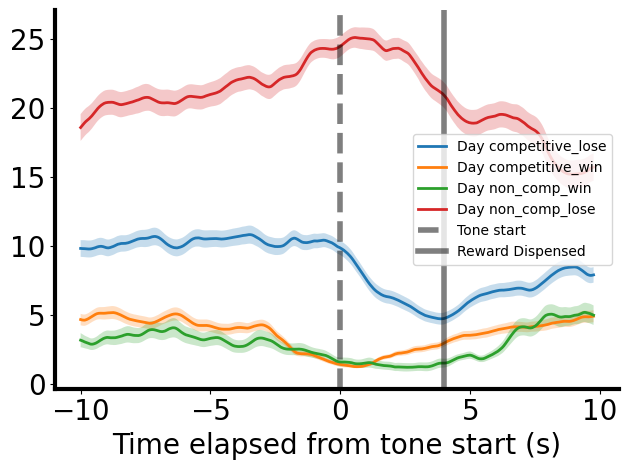

In [78]:
fig, ax = plt.subplots()

ax.set_xlabel("Time elapsed from tone start (s)", size=20)
ax.set_ylabel("", size=20)
# ax.set_title("Probability Inside Port Before/After Tone for Subject: {}".format(subject_id))

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
# Hide top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Leave bottom and left spines
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)


for num in all_velocity_df["competition_and_trial_label"].unique():


    current_df = all_velocity_df[all_velocity_df["competition_and_trial_label"] == num]
    current_arr = np.vstack(current_df["distance"].apply(lambda x: x[:595]).values)


    arr_mean = np.nanmean(current_arr, axis=0)
    arr_sem = np.nanstd(current_arr, axis=0) / ((current_arr.shape[0]) ** 0.5)
    plt.plot(np.linspace(-10,9.75,595), arr_mean, label="Day {}".format(str(num)), linewidth=2)

    ax.fill_between(np.linspace(-10,9.75,595), arr_mean - arr_sem , arr_mean + arr_sem , \
                   alpha=.25)


plt.axvline(x=0, color="black", label="Tone start", linewidth=4, alpha=0.5, linestyle="--")
plt.axvline(x=4, color="black", label="Reward Dispensed", linewidth=4, alpha=0.5)

# plt.ylim(0, 1.1)

plt.legend()
plt.tight_layout()
# plt.savefig(os.path.join(probability_inside_port_plots_output_directory, "probability_inside_port_all_subjects.png"))

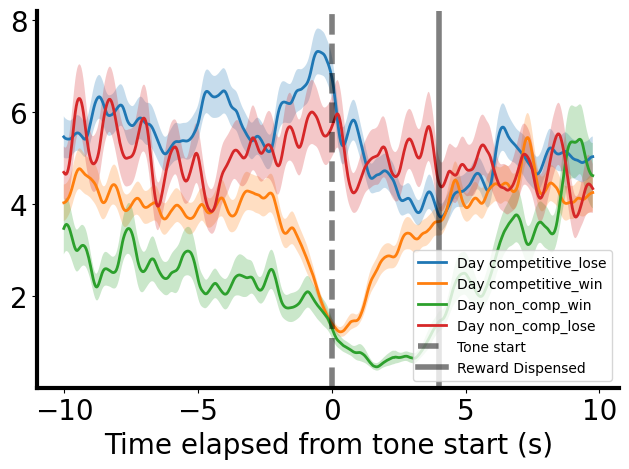

In [79]:
fig, ax = plt.subplots()

ax.set_xlabel("Time elapsed from tone start (s)", size=20)
ax.set_ylabel("", size=20)
# ax.set_title("Probability Inside Port Before/After Tone for Subject: {}".format(subject_id))

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
# Hide top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Leave bottom and left spines
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)


for num in all_velocity_df["competition_and_trial_label"].unique():


    current_df = all_velocity_df[all_velocity_df["competition_and_trial_label"] == num]
    current_arr = np.vstack(current_df["velocity"].apply(lambda x: x[:595]).values)


    arr_mean = np.nanmean(current_arr, axis=0)
    arr_sem = np.nanstd(current_arr, axis=0) / ((current_arr.shape[0]) ** 0.5)
    plt.plot(np.linspace(-10,9.75,595), arr_mean, label="Day {}".format(str(num)), linewidth=2)

    ax.fill_between(np.linspace(-10,9.75,595), arr_mean - arr_sem , arr_mean + arr_sem , \
                   alpha=.25)


plt.axvline(x=0, color="black", label="Tone start", linewidth=4, alpha=0.5, linestyle="--")
plt.axvline(x=4, color="black", label="Reward Dispensed", linewidth=4, alpha=0.5)

# plt.ylim(0, 1.1)

plt.legend()
plt.tight_layout()
# plt.savefig(os.path.join(probability_inside_port_plots_output_directory, "probability_inside_port_all_subjects.png"))

In [80]:
current_df["distance"].values[0]

array([25.11023  , 25.217716 , 25.324568 , 25.428831 , 25.483809 ,
       25.576551 , 25.584564 , 25.546457 , 25.48956  , 25.47307  ,
       25.54161  , 25.619463 , 25.634893 , 25.687344 , 25.768822 ,
       25.829092 , 25.897156 , 25.94241  , 25.962282 , 25.9069   ,
       25.765987 , 25.607246 , 25.421703 , 25.163034 , 24.884478 ,
       24.575512 , 24.245077 , 23.909563 , 23.575603 , 23.324753 ,
       23.110323 , 22.935692 , 22.799318 , 22.712706 , 22.631208 ,
       22.529688 , 22.438913 , 22.363346 , 22.331272 , 22.361517 ,
       22.415518 , 22.459204 , 22.49265  , 22.532644 , 22.576492 ,
       22.62149  , 22.729477 , 22.886948 , 23.103727 , 23.345594 ,
       23.592155 , 23.82632  , 24.072481 , 24.326199 , 24.602045 ,
       24.906351 , 25.235157 , 25.584768 , 25.994572 , 26.427437 ,
       26.803255 , 27.163351 , 27.48853  , 27.745352 , 27.920364 ,
       28.022686 , 28.054892 , 28.028437 , 27.957104 , 27.843782 ,
       27.75535  , 27.665598 , 27.571024 , 27.405197 , 27.1639

In [81]:
all_velocity_df.groupby(["competition_label"]).count()

,recording,subject_id,tone_start,trial_label,velocity,distance,cluster_id,competition_and_trial_label
competition_label,,,,,,,,
competitive,560,560,560,560,560,560,560,560
non_comp,230,230,230,230,230,230,230,230


# Looking at the trial proportions

In [83]:
copy_of_grouped_exploded_columns.head()

,video_name,current_subject,10s_after_tone_frame,10s_before_tone_frame,agent_locations,agent_nose,agent_nose_to_reward_port,agent_tail_base,agent_thorax,agent_thorax_velocity,...,start_frame,stop_frame,tracked_subject,video_id,tone_start_ranges,trial_label,competition_label,per_trial_competition_label,per_trial_trial_label,trial_comp_tuple
0,20240317_151922_long_comp_subj_3-1_and_3-3.1,3.1,"[1686, 1686, 1686, 1686, 1686, 1686, 1686, 168...","[1086, 1086, 1086, 1086, 1086, 1086, 1086, 108...","[[[47.329585864054316, 13.395104517336417], [4...","[[43.139588993359475, 13.385259646809214], [43...","[29.850004, 29.948483, 30.033619, 30.119339, 3...","[[54.49241922411595, 12.722769593270066], [54....","[[51.04336785027878, 11.609328010205985], [51....","[1.75459, 0.8485628, 0.20676309, -0.17881195, ...",...,1,45736,"[3.1, 3.3]",0,"{1287955: [(0, 599)], 3287980: [(600, 1199)], ...","[lose, lose, lose, lose, lose, lose, lose, los...","[competitive, competitive, competitive, compet...","[competitive, non_comp, non_comp, competitive,...","[lose, win, win, win, win, lose, win, lose, wi...","[(lose, competitive), (win, non_comp), (win, n..."
1,20240317_151922_long_comp_subj_3-1_and_3-3.1,3.3,"[1686, 1686, 1686, 1686, 1686, 1686, 1686, 168...","[1086, 1086, 1086, 1086, 1086, 1086, 1086, 108...","[[[61.390550187751444, 36.122362967315595], [5...","[[60.14673983110819, 38.0809500426292], [60.14...","[0.7214881, 0.70931464, 0.7049949, 0.705891, 0...","[[65.86894804065032, 31.8436244490543], [65.86...","[[64.11036004541992, 34.137273635147906], [64....","[0.11019329, 0.08970148, 0.09392373, 0.1159680...",...,1,45736,"[3.1, 3.3]",0,"{1287955: [(0, 599)], 3287980: [(600, 1199)], ...","[win, win, win, win, win, win, win, win, win, ...","[competitive, competitive, competitive, compet...","[competitive, non_comp, non_comp, competitive,...","[win, lose, lose, lose, lose, win, lose, win, ...","[(win, competitive), (lose, non_comp), (lose, ..."
2,20240317_172017_long_comp_subj_4-2_and_4-3.1,4.2,"[1701, 1701, 1701, 1701, 1701, 1701, 1701, 170...","[1100, 1100, 1100, 1100, 1100, 1100, 1100, 110...","[[[61.75545079959451, 33.21821636449367], [59....","[[60.79884848875681, 35.963595797483414], [60....","[1.2679133, 1.1848546, 1.0835545, 1.0503241, 1...","[[56.32709801682682, 29.966639024342353], [56....","[[57.3449526902064, 32.078917344899914], [57.5...","[0.28695866, 0.29812592, 0.3080636, 0.34382957...",...,1,58878,"[4.2, 4.3]",1,"{1302635: [(0, 600)], 3302656: [(601, 1200)], ...","[win, win, win, win, win, win, win, win, win, ...","[competitive, competitive, competitive, compet...","[competitive, competitive, competitive, compet...","[win, lose, lose, lose, lose, lose, lose, lose...","[(win, competitive), (lose, competitive), (los..."
3,20240317_172017_long_comp_subj_4-2_and_4-3.1,4.3,"[1701, 1701, 1701, 1701, 1701, 1701, 1701, 170...","[1100, 1100, 1100, 1100, 1100, 1100, 1100, 110...","[[[67.1750209289574, 9.986812953490931], [69.1...","[[65.23110812441777, 8.220414676017084], [62.5...","[28.389486, 28.209822, 28.007545, 27.813864, 2...","[[72.8621368084351, 13.53665765315761], [72.41...","[[72.18478668206376, 10.328978616940205], [71....","[21.16527, 21.272135, 21.302916, 21.162853, 20...",...,1,58878,"[4.2, 4.3]",1,"{1302635: [(0, 600)], 3302656: [(601, 1200)], ...","[lose, lose, lose, lose, lose, lose, lose, los...","[competitive, competitive, competitive, compet...","[competitive, competitive, competitive, compet...","[lose, win, win, win, win, win, win, win, win,...","[(lose, competitive), (win, competitive), (win..."
4,20240318_143819_long_comp_subj_3-3_and_3-4.1,3.3,"[1733, 1733, 1733, 1733, 1733, 1733, 1733, 173...","[1134, 1134, 1134, 1134, 1134, 1134, 1134, 113...","[[[61.29948457574409, 34.98487547102027], [61....","[[58.01061366578415, 33.98924535992776], [58.0...","[3.077167, 3.613538, 4.1945314, 4.827455, 5.53...","[[68.06216599593583, 32.37245454635553], [67.8...","[[65.57930503887175, 33.84569047638807], [65.3...","[8.288751, 9.37406

In [94]:
copy_of_grouped_exploded_columns["trial_and_comp_tuple"] = copy_of_grouped_exploded_columns.apply(lambda x: list(zip(x["per_trial_trial_label"], x["per_trial_competition_label"])), axis=1)

In [96]:
copy_of_grouped_exploded_columns["trial_and_comp_tuple"].head()

0    [(lose, competitive), (win, non_comp), (win, n...
1    [(win, competitive), (lose, non_comp), (lose, ...
2    [(win, competitive), (lose, competitive), (los...
3    [(lose, competitive), (win, competitive), (win...
4    [(lose, non_comp), (lose, non_comp), (lose, no...
Name: trial_and_comp_tuple, dtype: object

In [99]:
copy_of_grouped_exploded_columns["trial_and_comp_counts"] = copy_of_grouped_exploded_columns["trial_and_comp_tuple"].apply(lambda x: Counter([tup for tup in x]))

In [100]:
copy_of_grouped_exploded_columns["trial_and_comp_counts"]

0     {('lose', 'competitive'): 12, ('win', 'non_com...
1     {('win', 'competitive'): 12, ('lose', 'non_com...
2     {('win', 'competitive'): 6, ('lose', 'competit...
3     {('lose', 'competitive'): 6, ('win', 'competit...
4     {('lose', 'non_comp'): 26, ('lose', 'competiti...
5     {('win', 'non_comp'): 26, ('win', 'competitive...
6     {('win', 'competitive'): 29, ('lose', 'competi...
7     {('lose', 'competitive'): 29, ('win', 'competi...
8     {('win', 'non_comp'): 30, ('win', 'competitive...
9     {('lose', 'non_comp'): 30, ('lose', 'competiti...
10    {('win', 'competitive'): 20, ('lose', 'competi...
11    {('lose', 'competitive'): 20, ('win', 'competi...
12    {('win', 'non_comp'): 3, ('win', 'competitive'...
13    {('lose', 'non_comp'): 3, ('lose', 'competitiv...
14    {('lose', 'After trial'): 1, ('lose', 'non_com...
15    {('win', 'After trial'): 1, ('win', 'non_comp'...
16    {('lose', 'non_comp'): 1, ('win', 'competitive...
17    {('win', 'non_comp'): 1, ('lose', 'competi

In [131]:
copy_of_grouped_exploded_columns["trial_and_comp_counts"].iloc[0]

Counter({('win', 'competitive'): 16,
         ('lose', 'competitive'): 12,
         ('win', 'non_comp'): 2})

In [202]:
# Convert the 'count_column' into a dataframe where keys become columns and values become data
counts_grouped_exploded_columns = pd.DataFrame(copy_of_grouped_exploded_columns['trial_and_comp_counts'].tolist()).fillna(0)

# Convert counts to integers (optional, as counts should be integers)
counts_grouped_exploded_columns = counts_grouped_exploded_columns.astype(int)

In [203]:
counts_grouped_exploded_columns = counts_grouped_exploded_columns.iloc[::2].reset_index(drop=True)

In [204]:
counts_grouped_exploded_columns

,"(lose, competitive)","(win, non_comp)","(win, competitive)","(lose, non_comp)","(tie, competitive)","(tie, None)","(lose, After trial)","(win, After trial)"
0,12,2,16,0,0,0,0,0
1,30,0,6,3,2,0,0,0
2,15,0,0,26,0,0,0,0
3,4,6,29,0,2,0,0,0
4,1,30,8,0,1,1,0,0
5,11,6,20,3,1,0,0,0
6,2,3,9,6,1,0,0,0
7,10,0,0,8,2,0,1,0
8,27,0,6,1,7,0,0,0
9,14,0,1,6,0,0,0,0


- Getting the competitive counts

In [205]:
competitive_columns = [col for col in counts_grouped_exploded_columns.columns if "competitive" in col and "tie" not in col]

In [206]:
counts_grouped_exploded_columns['competitive'] = counts_grouped_exploded_columns[competitive_columns].sum(axis=1)

In [207]:
non_competitive_columns = [col for col in counts_grouped_exploded_columns.columns if "non_comp" in col and "tie" not in col]

In [208]:
counts_grouped_exploded_columns['non-comp'] = counts_grouped_exploded_columns[non_competitive_columns].sum(axis=1)

In [209]:
tie_columns = [col for col in counts_grouped_exploded_columns.columns if "tie" in col]

In [210]:
counts_grouped_exploded_columns['tie'] = counts_grouped_exploded_columns[tie_columns].sum(axis=1)

In [211]:
proportions_grouped_exploded_columns = counts_grouped_exploded_columns[["competitive", "non-comp", "tie"]]

In [212]:
proportions_grouped_exploded_columns = proportions_grouped_exploded_columns.div(proportions_grouped_exploded_columns.sum(axis=1), axis=0)

- TODO: Color thism

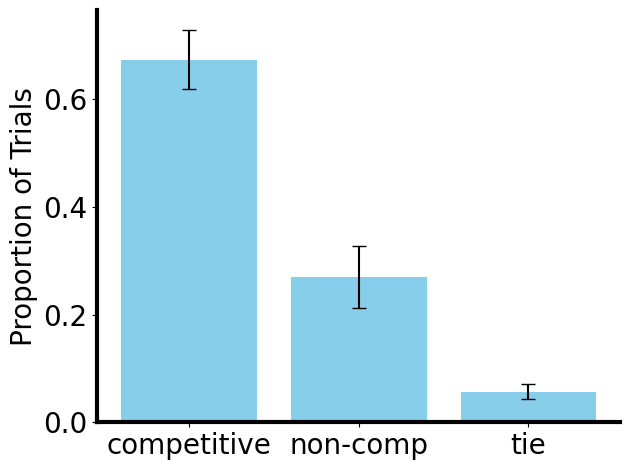

In [213]:
fig, ax = plt.subplots()

# Calculate means and SEM for each column
means = proportions_grouped_exploded_columns.mean()
sems = proportions_grouped_exploded_columns.sem()

ax.bar(means.index, means.values, yerr=sems.values, capsize=5, color='skyblue')

# Adding labels and title
plt.ylabel('Proportion of Trials', size=20)

# Hide top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Leave bottom and left spines
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

# Show the plot
plt.tight_layout()
plt.show()

- Getting the win vs lose counts

In [214]:
# Convert the 'count_column' into a dataframe where keys become columns and values become data
counts_grouped_exploded_columns = pd.DataFrame(copy_of_grouped_exploded_columns['trial_and_comp_counts'].tolist()).fillna(0)

# Convert counts to integers (optional, as counts should be integers)
counts_grouped_exploded_columns = counts_grouped_exploded_columns.astype(int)

In [215]:
counts_grouped_exploded_columns

,"(lose, competitive)","(win, non_comp)","(win, competitive)","(lose, non_comp)","(tie, competitive)","(tie, None)","(lose, After trial)","(win, After trial)"
0,12,2,16,0,0,0,0,0
1,16,0,12,2,0,0,0,0
2,30,0,6,3,2,0,0,0
3,6,3,30,0,2,0,0,0
4,15,0,0,26,0,0,0,0
5,0,26,15,0,0,0,0,0
6,4,6,29,0,2,0,0,0
7,29,0,4,6,2,0,0,0
8,1,30,8,0,1,1,0,0
9,8,0,1,30,1,1,0,0


- Getting the competitive counts

In [216]:
win_columns = [col for col in counts_grouped_exploded_columns.columns if "win" in col and "tie" not in col]

In [217]:
counts_grouped_exploded_columns['win'] = counts_grouped_exploded_columns[win_columns].sum(axis=1)

In [218]:
lose_columns = [col for col in counts_grouped_exploded_columns.columns if "lose" in col and "tie" not in col]

In [219]:
counts_grouped_exploded_columns['lose'] = counts_grouped_exploded_columns[lose_columns].sum(axis=1)

In [225]:
tie_columns = [col for col in counts_grouped_exploded_columns.columns if "tie" in col]

In [226]:
counts_grouped_exploded_columns['tie'] = counts_grouped_exploded_columns[tie_columns].sum(axis=1)

In [227]:
proportions_grouped_exploded_columns = counts_grouped_exploded_columns[["win", "lose", "tie"]]

In [228]:
proportions_grouped_exploded_columns = proportions_grouped_exploded_columns.div(proportions_grouped_exploded_columns.sum(axis=1), axis=0)

In [229]:
proportions_grouped_exploded_columns["is_winner"] = proportions_grouped_exploded_columns["win"] > proportions_grouped_exploded_columns["lose"]

In [235]:
proportions_grouped_exploded_columns["winner_or_loser"] = proportions_grouped_exploded_columns["is_winner"].apply(lambda x: "Winner" if x else "Loser")

In [236]:
proportions_grouped_exploded_columns

,win,lose,tie,is_winner,winner_or_loser
0,0.600000,0.400000,0.000000,True,Winner
1,0.400000,0.600000,0.000000,False,Loser
2,0.146341,0.804878,0.048780,False,Loser
3,0.804878,0.146341,0.048780,True,Winner
4,0.000000,1.000000,0.000000,False,Loser
5,1.000000,0.000000,0.000000,True,Winner
6,0.853659,0.097561,0.048780,True,Winner
7,0.097561,0.853659,0.048780,False,Loser
8,0.926829,0.024390,0.048780,True,Winner
9,0.024390,0.926829,0.048780,False,Loser


In [240]:
group_means.sort_index(ascending=False)

winner_or_loser
Winner    0.796659
Loser     0.147204
Name: win, dtype: float64

In [ ]:
fig, ax = plt.subplots()

# Calculate means and SEM for each column
means = proportions_grouped_exploded_columns.mean()
sems = proportions_grouped_exploded_columns.sem()

ax.bar(means.index, means.values, yerr=sems.values, capsize=5, color='skyblue')

# Adding labels and title
plt.ylabel('Proportion of Trials', size=20)

# Hide top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Leave bottom and left spines
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

# Show the plot
plt.tight_layout()
plt.show()

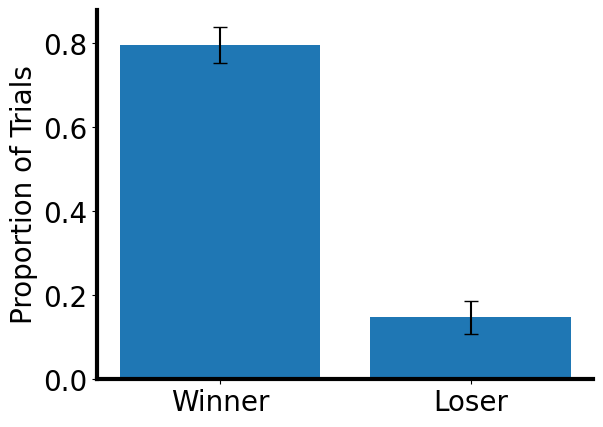

In [244]:
fig, ax = plt.subplots()


group_means = proportions_grouped_exploded_columns.groupby('winner_or_loser')['win'].mean().sort_index(ascending=False)
group_sem = proportions_grouped_exploded_columns.groupby('winner_or_loser')['win'].sem().sort_index(ascending=False)

# Plotting the bar plot with error bars (SEM)
plt.bar(group_means.index, group_means, yerr=group_sem, capsize=5)

# Adding labels and title
plt.ylabel('Proportion of Trials', size=20)

# Hide top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Leave bottom and left spines
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

plt.show()

# Old stuff below

In [84]:
copy_of_grouped_exploded_columns["trial_counts"] = copy_of_grouped_exploded_columns["trial_comp_tuple"].apply(lambda x: Counter([tup[0] for tup in x]))

In [85]:
copy_of_grouped_exploded_columns["comp_counts"] = copy_of_grouped_exploded_columns["trial_comp_tuple"].apply(lambda x: Counter([tup[1] for tup in x]))

In [93]:
copy_of_grouped_exploded_columns["comp_counts"]

0                    {'competitive': 28, 'non_comp': 2}
1                    {'competitive': 28, 'non_comp': 2}
2                    {'competitive': 38, 'non_comp': 3}
3                    {'competitive': 38, 'non_comp': 3}
4                   {'non_comp': 26, 'competitive': 15}
5                   {'non_comp': 26, 'competitive': 15}
6                    {'competitive': 35, 'non_comp': 6}
7                    {'competitive': 35, 'non_comp': 6}
8        {'non_comp': 30, 'competitive': 10, 'None': 1}
9        {'non_comp': 30, 'competitive': 10, 'None': 1}
10                   {'competitive': 32, 'non_comp': 9}
11                   {'competitive': 32, 'non_comp': 9}
12                   {'non_comp': 9, 'competitive': 12}
13                   {'non_comp': 9, 'competitive': 12}
14    {'After trial': 1, 'non_comp': 8, 'competitive...
15    {'After trial': 1, 'non_comp': 8, 'competitive...
16                   {'non_comp': 1, 'competitive': 40}
17                   {'non_comp': 1, 'competitiv

In [86]:
copy_of_grouped_exploded_columns.head()

,video_name,current_subject,10s_after_tone_frame,10s_before_tone_frame,agent_locations,agent_nose,agent_nose_to_reward_port,agent_tail_base,agent_thorax,agent_thorax_velocity,...,tracked_subject,video_id,tone_start_ranges,trial_label,competition_label,per_trial_competition_label,per_trial_trial_label,trial_comp_tuple,trial_counts,comp_counts
0,20240317_151922_long_comp_subj_3-1_and_3-3.1,3.1,"[1686, 1686, 1686, 1686, 1686, 1686, 1686, 168...","[1086, 1086, 1086, 1086, 1086, 1086, 1086, 108...","[[[47.329585864054316, 13.395104517336417], [4...","[[43.139588993359475, 13.385259646809214], [43...","[29.850004, 29.948483, 30.033619, 30.119339, 3...","[[54.49241922411595, 12.722769593270066], [54....","[[51.04336785027878, 11.609328010205985], [51....","[1.75459, 0.8485628, 0.20676309, -0.17881195, ...",...,"[3.1, 3.3]",0,"{1287955: [(0, 599)], 3287980: [(600, 1199)], ...","[lose, lose, lose, lose, lose, lose, lose, los...","[competitive, competitive, competitive, compet...","[competitive, non_comp, non_comp, competitive,...","[lose, win, win, win, win, lose, win, lose, wi...","[(lose, competitive), (win, non_comp), (win, n...","{'lose': 12, 'win': 18}","{'competitive': 28, 'non_comp': 2}"
1,20240317_151922_long_comp_subj_3-1_and_3-3.1,3.3,"[1686, 1686, 1686, 1686, 1686, 1686, 1686, 168...","[1086, 1086, 1086, 1086, 1086, 1086, 1086, 108...","[[[61.390550187751444, 36.122362967315595], [5...","[[60.14673983110819, 38.0809500426292], [60.14...","[0.7214881, 0.70931464, 0.7049949, 0.705891, 0...","[[65.86894804065032, 31.8436244490543], [65.86...","[[64.11036004541992, 34.137273635147906], [64....","[0.11019329, 0.08970148, 0.09392373, 0.1159680...",...,"[3.1, 3.3]",0,"{1287955: [(0, 599)], 3287980: [(600, 1199)], ...","[win, win, win, win, win, win, win, win, win, ...","[competitive, competitive, competitive, compet...","[competitive, non_comp, non_comp, competitive,...","[win, lose, lose, lose, lose, win, lose, win, ...","[(win, competitive), (lose, non_comp), (lose, ...","{'win': 12, 'lose': 18}","{'competitive': 28, 'non_comp': 2}"
2,20240317_172017_long_comp_subj_4-2_and_4-3.1,4.2,"[1701, 1701, 1701, 1701, 1701, 1701, 1701, 170...","[1100, 1100, 1100, 1100, 1100, 1100, 1100, 110...","[[[61.75545079959451, 33.21821636449367], [59....","[[60.79884848875681, 35.963595797483414], [60....","[1.2679133, 1.1848546, 1.0835545, 1.0503241, 1...","[[56.32709801682682, 29.966639024342353], [56....","[[57.3449526902064, 32.078917344899914], [57.5...","[0.28695866, 0.29812592, 0.3080636, 0.34382957...",...,"[4.2, 4.3]",1,"{1302635: [(0, 600)], 3302656: [(601, 1200)], ...","[win, win, win, win, win, win, win, win, win, ...","[competitive, competitive, competitive, compet...","[competitive, competitive, competitive, compet...","[win, lose, lose, lose, lose, lose, lose, lose...","[(win, competitive), (lose, competitive), (los...","{'win': 6, 'lose': 33, 'tie': 2}","{'competitive': 38, 'non_comp': 3}"
3,20240317_172017_long_comp_subj_4-2_and_4-3.1,4.3,"[1701, 1701, 1701, 1701, 1701, 1701, 1701, 170...","[1100, 1100, 1100, 1100, 1100, 1100, 1100, 110...","[[[67.1750209289574, 9.986812953490931], [69.1...","[[65.23110812441777, 8.220414676017084], [62.5...","[28.389486, 28.209822, 28.007545, 27.813864, 2...","[[72.8621368084351, 13.53665765315761], [72.41...","[[72.18478668206376, 10.328978616940205], [71....","[21.16527, 21.272135, 21.302916, 21.162853, 20...",...,"[4.2, 4.3]",1,"{1302635: [(0, 600)], 3302656: [(601, 1200)], ...","[lose, lose, lose, lose, lose, lose, lose, los...","[competitive, competitive, competitive, compet...","[competitive, competitive, competitive, compet...","[lose, win, win, win, win, win, win, win, win,...","[(lose, competitive), (win, competitive), (win...","{'lose': 6, 'win': 33, 'tie': 2}","{'competitive': 38, 'non_comp': 3}"
4,20240318_143819_long_comp_subj_3-3_and_3-4.1,3.3,"[1733, 1733, 1733, 1733, 1733, 1733, 1733, 173...","[1134, 1134, 1134, 1134, 1134, 1134, 1134, 113...","[[[61.29948457574409, 34.9848754710202

In [87]:
copy_of_grouped_exploded_columns["trial_ratios"] = copy_of_grouped_exploded_columns["trial_counts"].apply(lambda x: {key: value/sum(x.values()) for key, value in x.items()})

In [88]:
copy_of_grouped_exploded_columns["comp_ratios"] = copy_of_grouped_exploded_columns["comp_counts"].apply(lambda x: {key: value/sum(x.values()) for key, value in x.items()})

In [89]:
copy_of_grouped_exploded_columns["dominance_ratios"] = copy_of_grouped_exploded_columns["trial_counts"].apply(lambda x: np.abs((x.get("win", 0) - x.get("lose", 0))/sum(x.values())))

In [90]:
copy_of_grouped_exploded_columns["dominance_ratios"].head()

0    0.200000
1    0.200000
2    0.658537
3    0.658537
4    1.000000
Name: dominance_ratios, dtype: float64

In [91]:
copy_of_grouped_exploded_columns["trial_ratios"].head()

0                            {'lose': 0.4, 'win': 0.6}
1                            {'win': 0.4, 'lose': 0.6}
2    {'win': 0.14634146341463414, 'lose': 0.8048780...
3    {'lose': 0.14634146341463414, 'win': 0.8048780...
4                                        {'lose': 1.0}
Name: trial_ratios, dtype: object

In [92]:
copy_of_grouped_exploded_columns["comp_ratios"].head()

0    {'competitive': 0.9333333333333333, 'non_comp'...
1    {'competitive': 0.9333333333333333, 'non_comp'...
2    {'competitive': 0.926829268292683, 'non_comp':...
3    {'competitive': 0.926829268292683, 'non_comp':...
4    {'non_comp': 0.6341463414634146, 'competitive'...
Name: comp_ratios, dtype: object

## Looking at cluster differences across different trial types

In [ ]:
raise ValueError("Stop here")

In [ ]:
grouped_exploded_columns["per_trial_trial_label"].iloc[2]

In [ ]:
grouped_exploded_columns["trial_comp_tuple"] = grouped_exploded_columns["trial_comp_tuple"].apply(lambda x: [tup for tup in x if all("After" not in item for item in tup)])

In [ ]:
grouped_exploded_columns["trial_comp_tuple"] = grouped_exploded_columns["trial_comp_tuple"].apply(lambda x: [tup for tup in x if all("tie" not in item for item in tup)])

In [ ]:
grouped_exploded_columns["tone_start_to_trial_label"] = grouped_exploded_columns.apply()